In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Exercise 3.8

##3.8 a i - iii

In [2]:
auto = pd.read_csv('data/Auto.csv', na_values=['?'])
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [3]:
fit = smf.ols('mpg ~ horsepower', data=auto).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 09 Aug 2015   Prob (F-statistic):           7.03e-81
Time:                        13:15:54   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

##3.8 a iv

In [4]:
# fit.predict has a bug in statsmodels 6.1 that should be corrected for 7.0
estimate = fit.params['Intercept'] + 98 * fit.params['horsepower']
print('The mpg associated with a horsepower of 98 is', estimate)

The mpg associated with a horsepower of 98 is 24.4670771525


##3.8 b

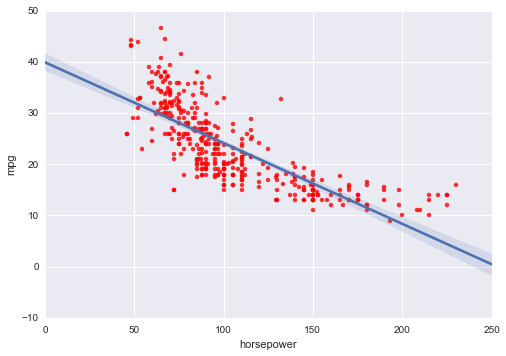

In [5]:
sns.regplot(y='mpg', x='horsepower', data=auto, scatter_kws={'color': 'red'})

##3.8 c

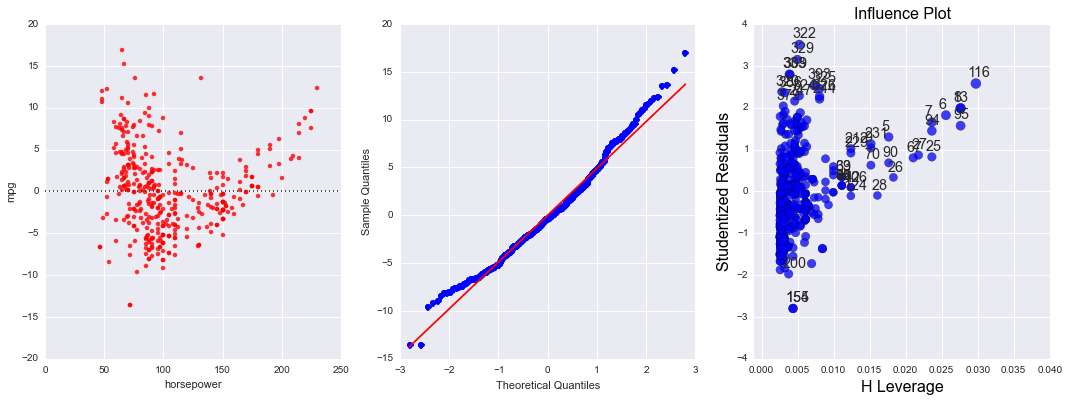

In [6]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.residplot(y='mpg', x='horsepower', data=auto, scatter_kws={'color': 'red'})
ax = plt.subplot(132)
fig = sm.qqplot(fit.resid, line='s', ax=ax)
ax = plt.subplot(133)
fig = sm.graphics.influence_plot(fit, ax=ax, size=10)
xmin, xmax = plt.xlim((-0.001, 0.04))
